In [1]:
import keras
from keras import datasets, regularizers, layers, models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

(train, train_lab), (test, test_lab) = datasets.cifar10.load_data()

test = test.astype('float32')
train = train.astype('float32')
test = test / 255
train = train / 255

num_classes = 10
train_labels_he = to_categorical(train_lab, num_classes)
test_labels_he = to_categorical(test_lab, num_classes)

train_data, valid_data = keras.utils.split_dataset((train, train_labels_he), left_size=0.8, shuffle=True)

baseline_model = Sequential()

baseline_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
baseline_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))

baseline_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))

baseline_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))

baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(128, activation='relu'))
baseline_model.add(layers.Dense(num_classes, activation='softmax'))

baseline_model.summary()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
baseline_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # sdg does not perform well

es= keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp = keras.callbacks.ModelCheckpoint('.model_1.keras', save_best_only=True, monitor='val_loss', mode='min')
red_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')


history2 = baseline_model.fit(train_data.batch(batch_size=64),  epochs=15,
                    validation_data=valid_data.batch(batch_size=64),  callbacks=[es, mcp, red_lr_loss])

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3109 - loss: 1.8442 - val_accuracy: 0.5683 - val_loss: 1.2120 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5832 - loss: 1.1590 - val_accuracy: 0.6631 - val_loss: 0.9572 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6926 - loss: 0.8808 - val_accuracy: 0.6908 - val_loss: 0.8797 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7433 - loss: 0.7364 - val_accuracy: 0.6983 - val_loss: 0.8811 - learning_rate: 0.0010
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7776 - loss: 0.6302 - val_accuracy: 0.7065 - val_loss: 0.8801 - learning_rate: 0.0010
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8091 - loss: 0.5399 - val_accuracy: 0.7130 - val_loss: 0.9044 - learning_rate: 0.0010
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8374 - loss: 0.4625 -

Text(0.5, 1.0, 'Loss Curves')

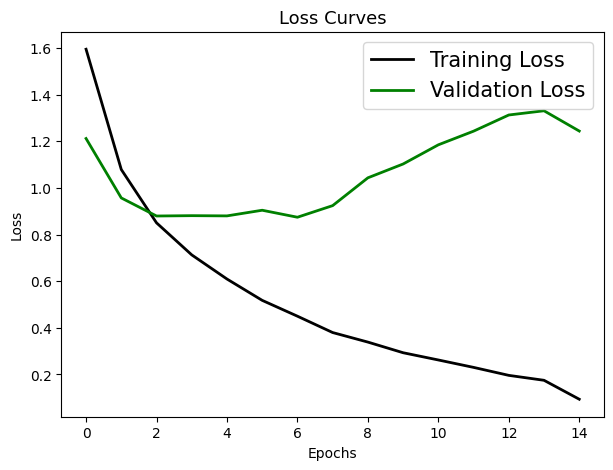

In [4]:
plt.figure(figsize=[7, 5])
plt.plot(history2.history['loss'], 'black', linewidth=2.0)
plt.plot(history2.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=13)

Text(0.5, 1.0, 'Accuracy Curves')

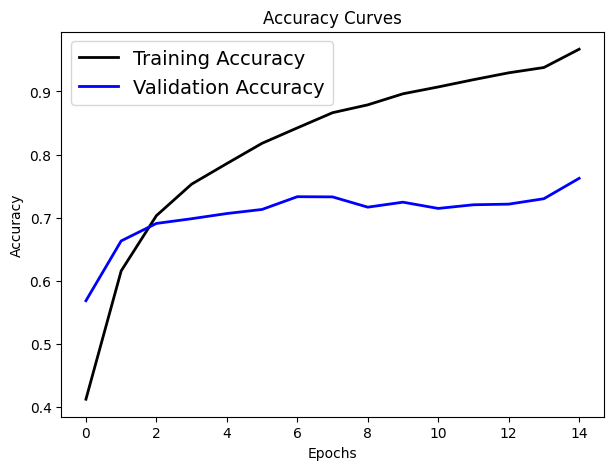

In [5]:
plt.figure(figsize=[7, 5])
plt.plot(history2.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history2.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

ADD L2 regularization

In [6]:
baseline_model = Sequential()

baseline_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3), kernel_regularizer=regularizers.l2(0.001)))
baseline_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))

baseline_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
baseline_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))

baseline_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
baseline_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))

baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
baseline_model.add(layers.Dense(num_classes, activation='softmax'))

baseline_model.summary()
baseline_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # sgd does not perform well


es= keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp = keras.callbacks.ModelCheckpoint('.model_2.keras', save_best_only=True, monitor='val_loss', mode='min')
red_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')


history3 = baseline_model.fit(train_data.batch(batch_size=64),  epochs=15,
                    validation_data=valid_data.batch(batch_size=64),  callbacks=[es, mcp, red_lr_loss])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2707 - loss: 2.1210 - val_accuracy: 0.4785 - val_loss: 1.5287 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5010 - loss: 1.4876 - val_accuracy: 0.5790 - val_loss: 1.3129 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5848 - loss: 1.2950 - val_accuracy: 0.6149 - val_loss: 1.2346 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6363 - loss: 1.1757 - val_accuracy: 0.6588 - val_loss: 1.1489 - learning_rate: 0.0010
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6771 - loss: 1.1002 - val_accuracy: 0.6781 - val_loss: 1.1046 - learning_rate: 0.0010
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7006 - loss: 1.0466 - val_accuracy: 0.6988 - val_loss: 1.0701 - learning_rate: 0.0010
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7262 - loss: 0.9918 - 

Text(0.5, 1.0, 'Loss Curves')

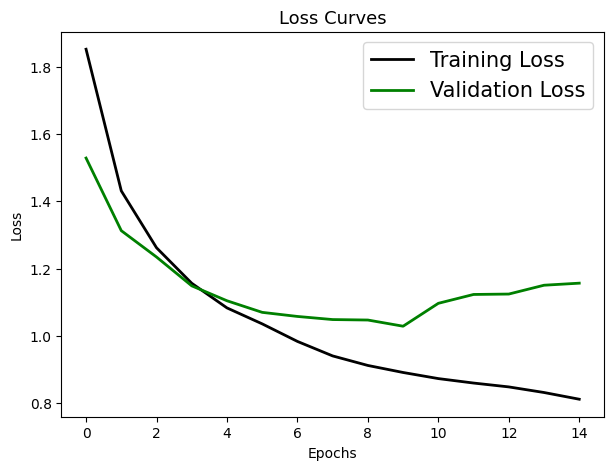

In [7]:
plt.figure(figsize=[7, 5])
plt.plot(history3.history['loss'], 'black', linewidth=2.0)
plt.plot(history3.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=13)

Text(0.5, 1.0, 'Accuracy Curves')

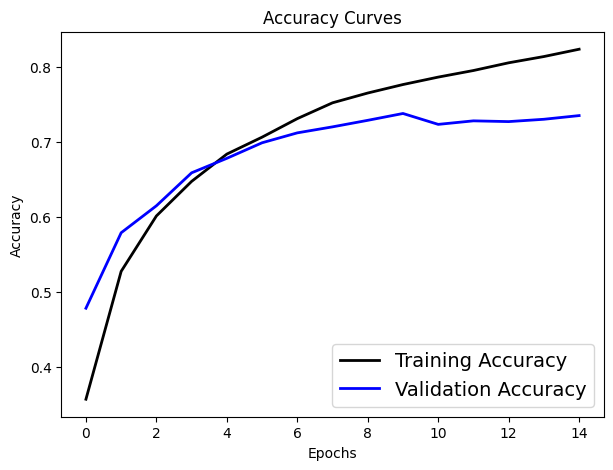

In [8]:
plt.figure(figsize=[7, 5])
plt.plot(history3.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history3.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

Adding dropout to reduce overfitting

In [2]:
baseline_model = Sequential()

baseline_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
baseline_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))
baseline_model.add(Dropout(0.25)) # dropout

baseline_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))
baseline_model.add(Dropout(0.25)) # dropout

baseline_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
baseline_model.add(layers.MaxPooling2D(pool_size=(2,2)))
baseline_model.add(Dropout(0.25)) # dropout

baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(128, activation='relu'))
baseline_model.add(Dropout(0.25)) # dropout
baseline_model.add(layers.Dense(num_classes, activation='softmax'))

baseline_model.summary()
baseline_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2524 - loss: 1.9975 - val_accuracy: 0.4898 - val_loss: 1.3988 - learning_rate: 0.0010
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4741 - loss: 1.4353 - val_accuracy: 0.6024 - val_loss: 1.1054 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5729 - loss: 1.1935 - val_accuracy: 0.6506 - val_loss: 0.9919 - learning_rate: 0.0010
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6199 - loss: 1.0619 - val_accuracy: 0.6790 - val_loss: 0.9122 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6634 - loss: 0.9551 - val_accuracy: 0.7043 - val_loss: 0.8332 - learning_rate: 0.0010
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6873 - loss: 0.8785 - val_accuracy: 0.6977 - val_loss: 0.8393 - learning_rate: 0.0010
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7099 - loss: 0.8189 - 

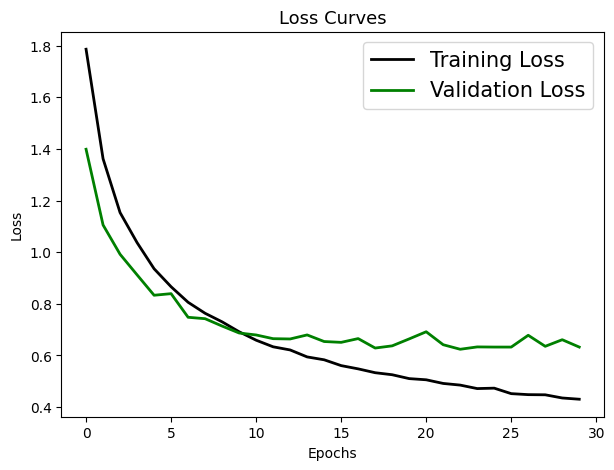

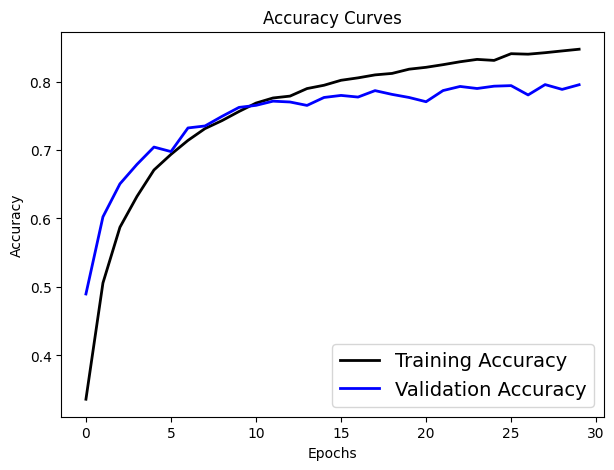

In [18]:
es= keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp = keras.callbacks.ModelCheckpoint('.model_11.keras', save_best_only=True, monitor='val_loss', mode='min')
red_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')


history11 = baseline_model.fit(train_data.batch(batch_size=64),  epochs=50,
                    validation_data=valid_data.batch(batch_size=64),  callbacks=[es, mcp, red_lr_loss])

# Plotting the results
plt.figure(figsize=[7, 5])
plt.plot(history11.history['loss'], 'black', linewidth=2.0)
plt.plot(history11.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=13)
plt.show()

plt.figure(figsize=[7, 5])
plt.plot(history11.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history11.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)
plt.show()

In [8]:
baseline_model.load_weights('.model_11.keras')
predictions = baseline_model.predict(test)
predictions = np.argmax(predictions, axis=1)

true_values = np.argmax(test_lab, axis=1)

accu = (predictions == true_values).sum() * 1.0 / true_values.shape[0]
print('Accuracy on test data = {}'.format(accu))

313/313 [30 ━━━━━━━━━━━━ 0s 1ms/step
Accuracy on test data = 0.7958


In [1]:
loss, accuracy = baseline_model.evaluate(test, test_lab, verbose=0)
print('Test loss:', loss)

Test loss: 0.4753


# ALEXNET

In [ ]:
!pip install keras-tuner

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam, SGD
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow import keras
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


seed = 18
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)


# Loading the train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalising the dataset to 0 to 1 range
# dividing by 255 as it is an RGB image
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

y_train_he = to_categorical(y_train, 10)
y_test_he = to_categorical(y_test, 10)

x_train, x_val, y_train_he, y_val_he = train_test_split(
    x_train, y_train_he, test_size=0.2, stratify=y_train, random_state=seed
)

training_data = tf.data.Dataset.from_tensor_slices((x_train, y_train_he))
validation_data = tf.data.Dataset.from_tensor_slices((x_val, y_val_he))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def ALEXNET_MODEL(input=(32, 32, 3), nc=10):
    alexnet_model = Sequential()

    alexnet_model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape=input))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    alexnet_model.add(Conv2D(192, (5, 5), activation='relu', padding="same"))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    alexnet_model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))


    alexnet_model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

    alexnet_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    alexnet_model.add(Flatten())
    alexnet_model.add(Dense(4096, activation='relu'))
    alexnet_model.add(Dropout(0.5))

    alexnet_model.add(Dense(4096, activation='relu'))
    alexnet_model.add(Dropout(0.5))

    alexnet_model.add(Dense(nc, activation='softmax'))

    return alexnet_model

ALEXNET_MODEL().summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 192)         │         307,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 384)           │         663,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,209,354 (92.35 MB)

 Trainable params: 24,209,354 (92.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
learning_rates = [0.001]

training_loss_alex = []
training_accu_alex = []
validation_loss_alex = []
validation_accu_alex = []

for lr in learning_rates:
    alexnet_model_1 = ALEXNET_MODEL()
    alexnet_model_1.compile(optimizer = Adam(learning_rate=lr), loss=keras.losses.categorical_crossentropy,  metrics=['accuracy'])

    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')


    mcpsave_alex = keras.callbacks.ModelCheckpoint("Alexnet_model.keras", save_best_only=True, monitor='val_loss', mode='min')

    print("----------------------------------------------------------------------------------------------------------------------")
    print(f"Model with learning rate : {lr}")  # this is completed
    print("----------------------------------------------------------------------------------------------------------------------")

    history_adam_1 = alexnet_model_1.fit(
        training_data.batch(batch_size=64),
        epochs=10,
        validation_data=validation_data.batch(batch_size=64),
        callbacks=[es, mcpsave_alex]
    )

    validation_accu_alex.append(history_adam_1.history['val_accuracy'])
    validation_loss_alex.append(history_adam_1.history['val_loss'])
    training_accu_alex.append(history_adam_1.history['accuracy'])
    training_loss_alex.append(history_adam_1.history['loss'])

----------------------------------------------------------------------------------------------------------------------
Model with learning rate : 0.001
----------------------------------------------------------------------------------------------------------------------
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0985 - loss: 2.3191 - val_accuracy: 0.0961 - val_loss: 2.3030
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.0961 - val_loss: 2.3030
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.0961 - val_loss: 2.3030
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3029
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3029
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3029
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3029
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.0961 - val_

In [ ]:
learning_rates = [0.001]

training_loss_alex_2 = []
training_accu_alex_2 = []
validation_loss_alex_2 = []
validation_accu_alex_2 = []

for lr in learning_rates:
    alexnet_model_2 = ALEXNET_MODEL()
    alexnet_model_2.compile(optimizer = Adam(learning_rate=lr), loss=keras.losses.categorical_crossentropy,  metrics=['accuracy'])

    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')


    mcpsave_alex_2 = keras.callbacks.ModelCheckpoint("Alexnet_model_1.keras", save_best_only=True, monitor='val_loss', mode='min')

    print("----------------------------------------------------------------------------------------------------------------------")
    print(f"Model with learning rate : {lr}")  # this is completed
    print("----------------------------------------------------------------------------------------------------------------------")

    history_adam = alexnet_model_2.fit(
        training_data.batch(batch_size=64),
        epochs=20,
        validation_data=validation_data.batch(batch_size=64),
        callbacks=[es, mcpsave_alex_2]
    )

    validation_accu_alex_2.append(history_adam.history['val_accuracy'])
    validation_loss_alex_2.append(history_adam.history['val_loss'])
    training_accu_alex_2.append(history_adam.history['accuracy'])
    training_loss_alex_2.append(history_adam.history['loss'])

----------------------------------------------------------------------------------------------------------------------
Model with learning rate : 0.001
----------------------------------------------------------------------------------------------------------------------
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2006 - loss: 2.0289 - val_accuracy: 0.3984 - val_loss: 1.5742
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4376 - loss: 1.4962 - val_accuracy: 0.5135 - val_loss: 1.3144
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5323 - loss: 1.2899 - val_accuracy: 0.5776 - val_loss: 1.1902
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5968 - loss: 1.1465 - val_accuracy: 0.5916 - val_loss: 1.1893
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6437 - loss: 1.0250 - val_accuracy: 0.6191 - val_loss: 1.1181
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6774 - loss: 0.9397 - val_accuracy: 0.6322 - val_loss: 1.0959
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6912 - loss: 0.8801 - val_accuracy: 0.6448 - val_loss: 1.0640
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7163 - loss: 0.8232 - val_accuracy: 0.6303 - val_

Text(0.5, 1.0, 'Accuracy Curves')

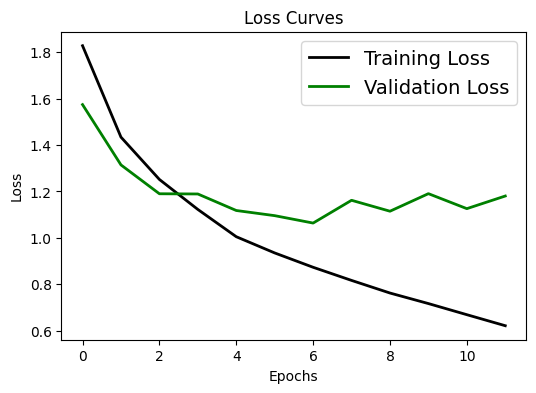

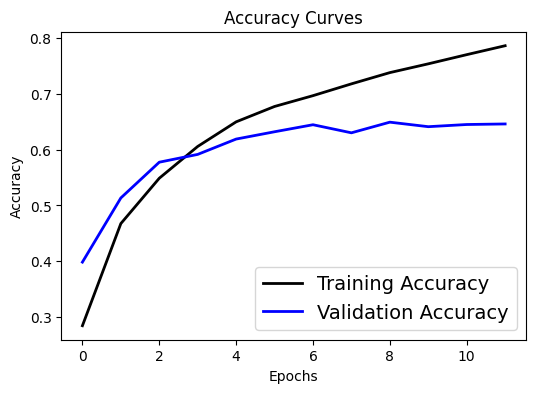

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history_adam.history['loss'], 'black', linewidth=2.0)
plt.plot(history_adam.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_adam.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_adam.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

using regularization

In [ ]:
def ALEXNET_MODEL_REG(input=(32, 32, 3), nc=10):
    alexnet_model = Sequential()

    alexnet_model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape=input, kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    alexnet_model.add(Conv2D(192, (5, 5), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    alexnet_model.add(Conv2D(384, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))

    alexnet_model.add(Conv2D(384, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))

    alexnet_model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    alexnet_model.add(Flatten())
    alexnet_model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(Dropout(0.15))

    alexnet_model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(Dropout(0.15))

    alexnet_model.add(Dense(nc, activation='softmax'))

    return alexnet_model


In [ ]:
learning_rates = [0.0001]

training_loss_alex_reg = []
training_accu_alex_reg = []
validation_loss_alex_reg = []
validation_accu_alex_reg = []


for lr in learning_rates:
    alexnet_model_reg_1 = ALEXNET_MODEL_REG()
    alexnet_model_reg_1.compile(optimizer = Adam(learning_rate=lr), loss=keras.losses.categorical_crossentropy,  metrics=['accuracy'])

    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')

    mcpsave_alex_reg = keras.callbacks.ModelCheckpoint("Alexnet_model_reg_1.keras", save_best_only=True, monitor='val_loss', mode='min')

    print("----------------------------------------------------------------------------------------------------------------------")
    print(f"Model with learning rate : {lr}")  # this is completed
    print("----------------------------------------------------------------------------------------------------------------------")

    history_adam_reg = alexnet_model_reg_1.fit(
        training_data.batch(batch_size=64),
        epochs=10,
        validation_data=validation_data.batch(batch_size=64),
        callbacks=[es, mcpsave_alex_reg]
    )

    validation_accu_alex_reg.append(history_adam_reg.history['val_accuracy'])
    validation_loss_alex_reg.append(history_adam_reg.history['val_loss'])
    training_accu_alex_reg.append(history_adam_reg.history['accuracy'])
    training_loss_alex_reg.append(history_adam_reg.history['loss'])

----------------------------------------------------------------------------------------------------------------------
Model with learning rate : 0.0001
----------------------------------------------------------------------------------------------------------------------
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2323 - loss: 5.2112 - val_accuracy: 0.4679 - val_loss: 2.0981
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4845 - loss: 1.9959 - val_accuracy: 0.5467 - val_loss: 1.6709
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5685 - loss: 1.6114 - val_accuracy: 0.5808 - val_loss: 1.5331
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6117 - loss: 1.4322 - val_accuracy: 0.6137 - val_loss: 1.4124
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6474 - loss: 1.3033 - val_accuracy: 0.6459 - val_loss: 1.3041
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6804 - loss: 1.2024 - val_accuracy: 0.6611 - val_loss: 1.2559
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7080 - loss: 1.1212 - val_accuracy: 0.6782 - val_loss: 1.2080
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7305 - loss: 1.0537 - val_accuracy: 0.6930 - va

Text(0.5, 1.0, 'Accuracy Curves')

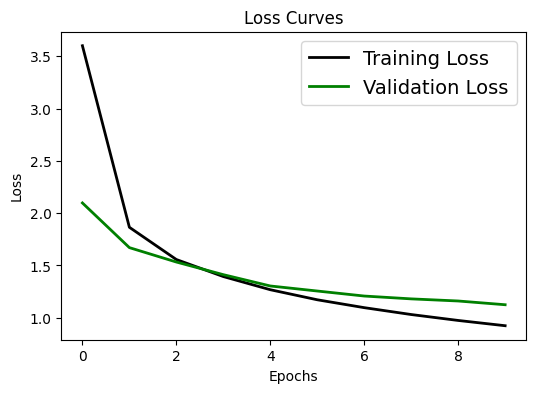

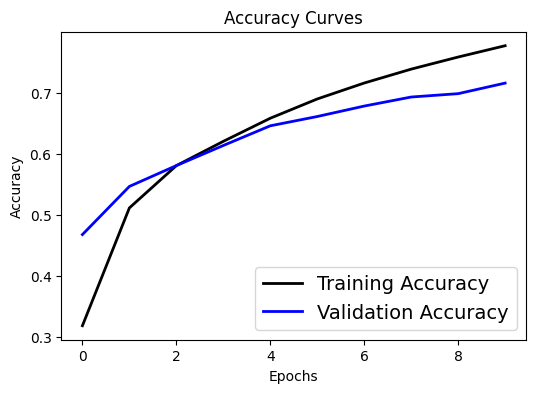

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history_adam_reg.history['loss'], 'black', linewidth=2.0)
plt.plot(history_adam_reg.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_adam_reg.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_adam_reg.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
best_model = keras.models.load_model("Alexnet_model_reg_1.keras")

loss, accu = best_model.evaluate(x_train, y_train_he, verbose=2)

print("loss on test data:", loss)
print("accuracy on test data:", accu)

loss on test data: 1.0972
accuracy on test data: 0.6945


using SGD

In [ ]:
learning_rates = [0.0001]

training_loss_alex_reg2 = []
training_accu_alex_reg2 = []
validation_loss_alex_reg2 = []
validation_accu_alex_reg2 = []


for lr in learning_rates:
    alexnet_model_reg2 = ALEXNET_MODEL_REG()
    alexnet_model_reg2.compile(optimizer = SGD(learning_rate=lr), loss=keras.losses.categorical_crossentropy,  metrics=['accuracy'])

    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')

    mcpsave_alex_reg = keras.callbacks.ModelCheckpoint("Alexnet_model_reg2.keras", save_best_only=True, monitor='val_loss', mode='min')

    print("----------------------------------------------------------------------------------------------------------------------")
    print(f"Model with learning rate : {lr}")  # this is completed
    print("----------------------------------------------------------------------------------------------------------------------")

    history_adam_reg2 = alexnet_model_reg2.fit(
        training_data.batch(batch_size=32),
        epochs=20,
        validation_data=validation_data.batch(batch_size=32),
        callbacks=[es, mcpsave_alex_reg]
    )

    validation_accu_alex_reg2.append(history_adam_reg2.history['val_accuracy'])
    validation_loss_alex_reg2.append(history_adam_reg2.history['val_loss'])
    training_accu_alex_reg2.append(history_adam_reg2.history['accuracy'])
    training_loss_alex_reg2.append(history_adam_reg2.history['loss'])

----------------------------------------------------------------------------------------------------------------------
Model with learning rate : 0.0001
----------------------------------------------------------------------------------------------------------------------
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.2560 - loss: 4.2273 - val_accuracy: 0.4828 - val_loss: 1.7635
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4954 - loss: 1.6864 - val_accuracy: 0.5797 - val_loss: 1.4214
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5870 - loss: 1.4069 - val_accuracy: 0.6269 - val_loss: 1.2783
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6382 - loss: 1.2526 - val_accuracy: 0.6478 - val_loss: 1.2278
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6779 - loss: 1.1480 - val_accuracy: 0.6782 - val_loss: 1.1526
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7146 - loss: 1.0576 - val_accuracy: 0.6995 - val_loss: 1.1158
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7387 - loss: 0.9917 - val_accuracy: 0.7162 - val_loss: 1.0809
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7609 - loss: 0.9362 - val_accura

Text(0.5, 1.0, 'Accuracy Curves')

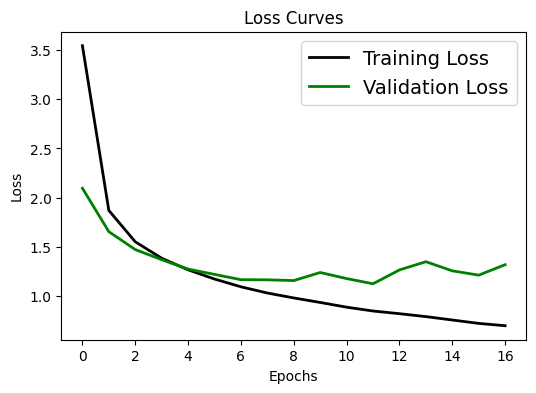

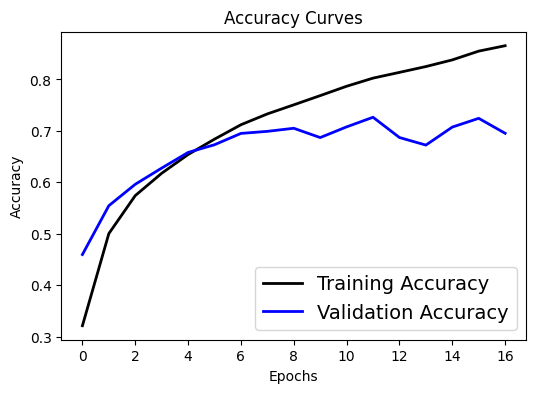

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history_adam_reg2.history['loss'], 'black', linewidth=2.0)
plt.plot(history_adam_reg2.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_adam_reg2.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_adam_reg2.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

best SGD

In [ ]:
def ALEXNET_MODEL_REG_1(input=(32, 32, 3), nc=10):
    alexnet_model = Sequential()

    alexnet_model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape=input, kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    alexnet_model.add(Conv2D(192, (5, 5), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))


    alexnet_model.add(Conv2D(384, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))

    alexnet_model.add(Conv2D(384, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))

    alexnet_model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    alexnet_model.add(Flatten())
    alexnet_model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(Dropout(0.25))

    alexnet_model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    alexnet_model.add(Dropout(0.25))

    alexnet_model.add(Dense(nc, activation='softmax'))

    return alexnet_model

In [ ]:
learning_rates = [0.00001]

training_loss_alex_reg11 = []
training_accu_alex_reg11 = []
validation_loss_alex_reg11 = []
validation_accu_alex_reg11 = []


for lr in learning_rates:
    alexnet_model_reg11 = ALEXNET_MODEL_REG_1()
    alexnet_model_reg11.compile(optimizer = SGD(learning_rate=lr), loss=keras.losses.categorical_crossentropy,  metrics=['accuracy'])

    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')

    mcpsave_alex_reg = keras.callbacks.ModelCheckpoint("Alexnet_model_reg11.keras", save_best_only=True, monitor='val_loss', mode='min')

    print("----------------------------------------------------------------------------------------------------------------------")
    print(f"Model with learning rate : {lr}")  # this is completed
    print("----------------------------------------------------------------------------------------------------------------------")

    history_adam_reg11 = alexnet_model_reg11.fit(
        training_data.batch(batch_size=64),
        epochs=40,
        validation_data=validation_data.batch(batch_size=64),
        callbacks=[es, mcpsave_alex_reg]
    )

    validation_accu_alex_reg11.append(history_adam_reg11.history['val_accuracy'])
    validation_loss_alex_reg11.append(history_adam_reg11.history['val_loss'])
    training_accu_alex_reg11.append(history_adam_reg11.history['accuracy'])
    training_loss_alex_reg11.append(history_adam_reg11.history['loss'])

----------------------------------------------------------------------------------------------------------------------
Model with learning rate : 1e-05
----------------------------------------------------------------------------------------------------------------------
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1711 - loss: 8.2429 - val_accuracy: 0.3361 - val_loss: 6.4730
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3427 - loss: 6.1806 - val_accuracy: 0.3877 - val_loss: 5.4347
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4003 - loss: 5.2723 - val_accuracy: 0.4375 - val_loss: 4.8162
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4387 - loss: 4.7277 - val_accuracy: 0.4699 - val_loss: 4.4174
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4633 - loss: 4.3699 - val_accuracy: 0.4922 - val_loss: 4.1512
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4892 - loss: 4.1158 - val_accuracy: 0.5055 - val_loss: 3.9513
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5053 - loss: 3.9151 - val_accuracy: 0.5214 - val_loss: 3.7753
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5206 - loss: 3.7461 - val_accuracy: 0.5327 - va

Text(0.5, 1.0, 'Accuracy Curves')

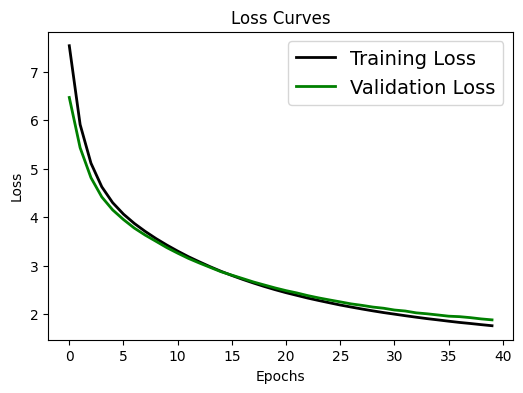

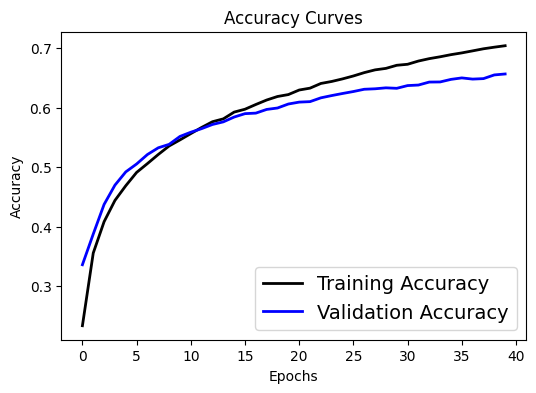

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history_adam_reg11.history['loss'], 'black', linewidth=2.0)
plt.plot(history_adam_reg11.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history_adam_reg11.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_adam_reg11.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

Accuracy and loss using SGD best model

In [ ]:
best_model = keras.models.load_model("Alexnet_model_reg11.keras")

# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(x_test, y_test_he, verbose=2)

print("loss on test data:", loss)
print("accuracy on test data:", accuracy)

loss on test data: 2.1649
accuracy on test data: 0.6409


# RESNET-18

In [ ]:
import torch
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
batch_size = 64
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_indices, val_indices = next(sss.split(torch.zeros(len(trainset.targets)), trainset.targets))

train_subset = Subset(trainset, train_indices)
valset = Subset(trainset, val_indices)

# DataLoaders for batch
trloader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
valoader = DataLoader(valset, batch_size=batch_size, shuffle=False)
tstloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

#######################
batch_size = 64
epochs = 10
learning_rate = 0.001
#######################

dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)
model.to(dev)

criterion = nn.CrossEntropyLoss()
optim = optim.Adam(model.parameters(), lr=learning_rate)

# 4. Training and validation loop with loss and accuracy tracking
def train_model(model, trloader, valloader, criterion, optim, epochs):
    train_loss, val_loss = [], []
    train_accu, val_accu = [], []

    for epoch in range(epochs):
        # Train the model
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_tr = 0

        for inputs, labels in trloader:
            inputs, labels = inputs.to(dev), labels.to(dev)
            optim.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optim.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_tr += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_train_loss / len(trloader)
        epoch_train_accu = 100 * correct_train / total_tr
        train_loss.append(epoch_train_loss)
        train_accu.append(epoch_train_accu)

        # Validate the model
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in valoader:
                inputs, labels = inputs.to(dev), labels.to(dev)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(valoader)
        epoch_val_accu = 100 * correct_val / total_val
        val_loss.append(epoch_val_loss)
        val_accu.append(epoch_val_accu)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accu:.2f}%")
        print(f"Epoch {epoch+1}/{epochs} - Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accu:.2f}%")
        print("---"*30)

    print("Training complete")
    return train_loss, val_loss, train_accu, val_accu

# Train the model and store the results
train_loss, val_loss, train_accu, val_accu = train_model(
    model, trloader, valoader, criterion, optim, epochs
)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10 - Train Loss: 0.9956, Train Accuracy: 66.34%
Epoch 1/10 - Val Loss: 0.7485, Val Accuracy: 74.68%
------------------------------------------------------------------------------------------
Epoch 2/10 - Train Loss: 0.6706, Train Accuracy: 77.62%
Epoch 2/10 - Val Loss: 0.6896, Val Accuracy: 76.27%
------------------------------------------------------------------------------------------
Epoch 3/10 - Train Loss: 0.5312, Train Accuracy: 82.35%
Epoch 3/10 - Val Loss: 0.6646, Val Accuracy: 77.70%
------------------------------------------------------------------------------------------
Epoch 4/10 - Train Loss: 0.4248, Train Accuracy: 85.75%
Epoch 4/10 - Val Loss: 0.6359, Val Accuracy: 79.20%
------------------------------------------------------------------------------------------
Epoch 5/10 - Train Loss: 0.3437, Train Accuracy: 88.33%
Epoch 5/10 - Val Loss: 0.6393, Val Accuracy: 79.30%
------------------------------------------------------------------------------------------
Epoch

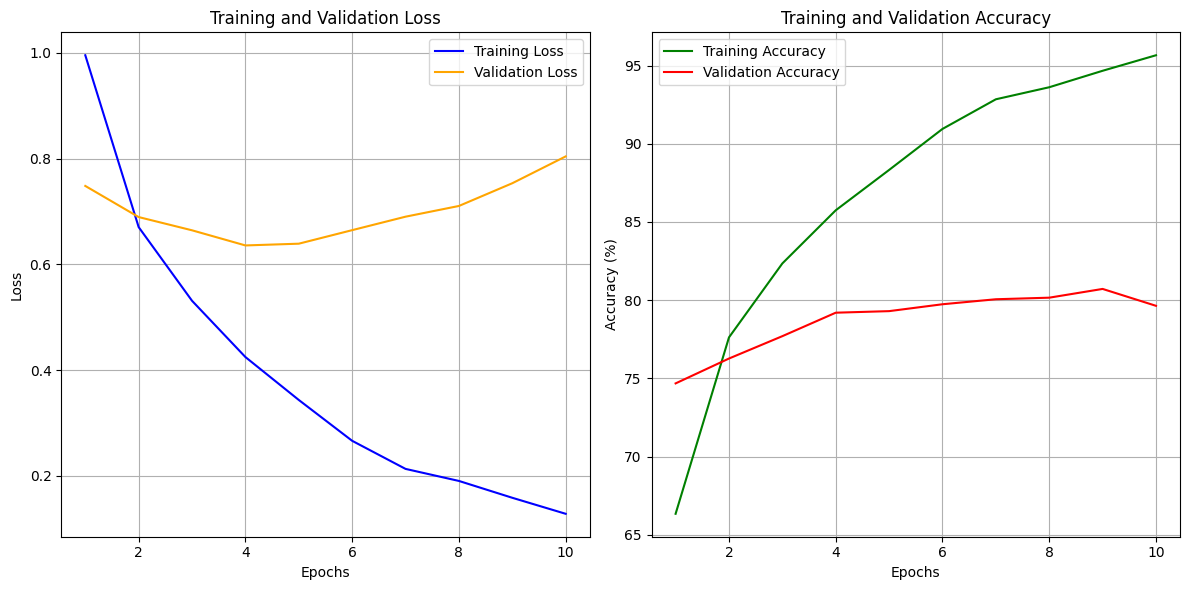

Test Accuracy: 79.77%


In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accu, label='Training Accuracy', color='green')
plt.plot(range(1, epochs + 1), val_accu, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Evaluate the model on the test set
def evaluate_model(model, tstloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in tstloader:
            inputs, labels = inputs.to(dev), labels.to(dev)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

evaluate_model(model, tstloader)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 64
num_epochs = 10
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load CIFAR-10 dataset (without resizing images)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet pre-trained normalization
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_subset, valset = random_split(trainset, [train_size, val_size])

trainloader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(valset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

model = models.resnet18(pretrained=True)

model.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

model.avgpool = nn.AdaptiveAvgPool2d((1, 1))

model.fc = nn.Linear(model.fc.in_features, 10)

# Move model to device (GPU or CPU)
model.to(device)

# 3. Set up the loss function, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 4. Training and validation loop with loss and accuracy tracking
def train_model(model, trainloader, valloader, criterion, optimizer, num_epochs):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Train the model
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_train_loss / len(trainloader)
        epoch_train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # Validate the model
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(valloader)
        epoch_val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%")
        print(f"Epoch {epoch+1}/{num_epochs} - Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")
        print("---"*30)

    print("Training complete")
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model and store the results
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, trainloader, valloader, criterion, optimizer, num_epochs
)

100%|██████████| 170M/170M [00:02<00:00, 78.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s]


Epoch 1/10 - Train Loss: 1.0998, Train Accuracy: 62.04%
Epoch 1/10 - Val Loss: 0.9927, Val Accuracy: 66.68%
------------------------------------------------------------------------------------------
Epoch 2/10 - Train Loss: 0.7436, Train Accuracy: 75.31%
Epoch 2/10 - Val Loss: 0.7472, Val Accuracy: 75.23%
------------------------------------------------------------------------------------------
Epoch 3/10 - Train Loss: 0.6376, Train Accuracy: 78.84%
Epoch 3/10 - Val Loss: 0.6785, Val Accuracy: 77.24%
------------------------------------------------------------------------------------------
Epoch 4/10 - Train Loss: 0.5697, Train Accuracy: 81.14%
Epoch 4/10 - Val Loss: 0.7169, Val Accuracy: 76.47%
------------------------------------------------------------------------------------------
Epoch 5/10 - Train Loss: 0.5101, Train Accuracy: 83.08%
Epoch 5/10 - Val Loss: 0.6123, Val Accuracy: 79.51%
------------------------------------------------------------------------------------------
Epoch

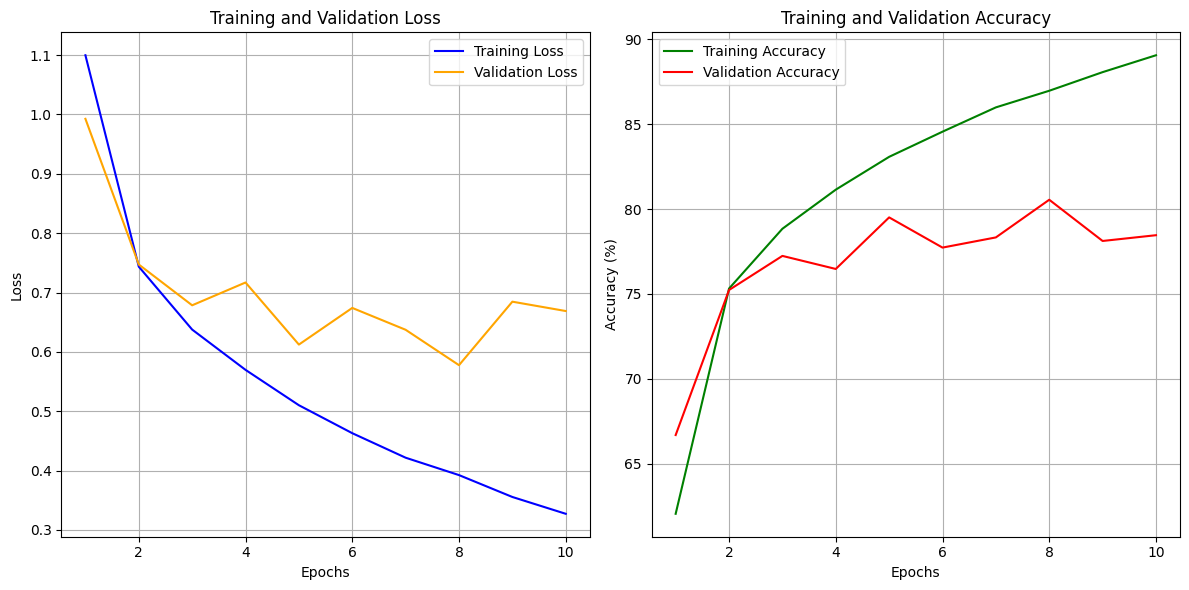

Test Accuracy: 78.03%


In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate the model on the test set
evaluate_model(model, testloader)

Adding L2 regulizer

In [ ]:

batch_size = 64
num_epochs = 10
learning_rate = 0.0001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load CIFAR-10 dataset (without resizing images)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet pre-trained normalization
])

# Download CIFAR-10 training and test datasets (no resizing)
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_subset, valset = random_split(trainset, [train_size, val_size])

trainloader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(valset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)


def train_model(model, trainloader, valloader, criterion, optimizer, num_epochs):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_train_loss / len(trainloader)
        epoch_train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(valloader)
        epoch_val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%")
        print(f"Epoch {epoch+1}/{num_epochs} - Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")
        print("---"*30)

    print("Training complete")
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model and store the results
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, trainloader, valloader, criterion, optimizer, num_epochs
)

100%|██████████| 170M/170M [00:03<00:00, 43.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s]


Epoch 1/10 - Train Loss: 1.2059, Train Accuracy: 58.22%
Epoch 1/10 - Val Loss: 1.1338, Val Accuracy: 62.25%
------------------------------------------------------------------------------------------
Epoch 2/10 - Train Loss: 0.8618, Train Accuracy: 71.05%
Epoch 2/10 - Val Loss: 0.8134, Val Accuracy: 72.25%
------------------------------------------------------------------------------------------
Epoch 3/10 - Train Loss: 0.7512, Train Accuracy: 74.86%
Epoch 3/10 - Val Loss: 0.8013, Val Accuracy: 73.23%
------------------------------------------------------------------------------------------
Epoch 4/10 - Train Loss: 0.6806, Train Accuracy: 77.10%
Epoch 4/10 - Val Loss: 0.7792, Val Accuracy: 73.72%
------------------------------------------------------------------------------------------
Epoch 5/10 - Train Loss: 0.6190, Train Accuracy: 79.42%
Epoch 5/10 - Val Loss: 0.6817, Val Accuracy: 76.93%
------------------------------------------------------------------------------------------
Epoch

Adam Best

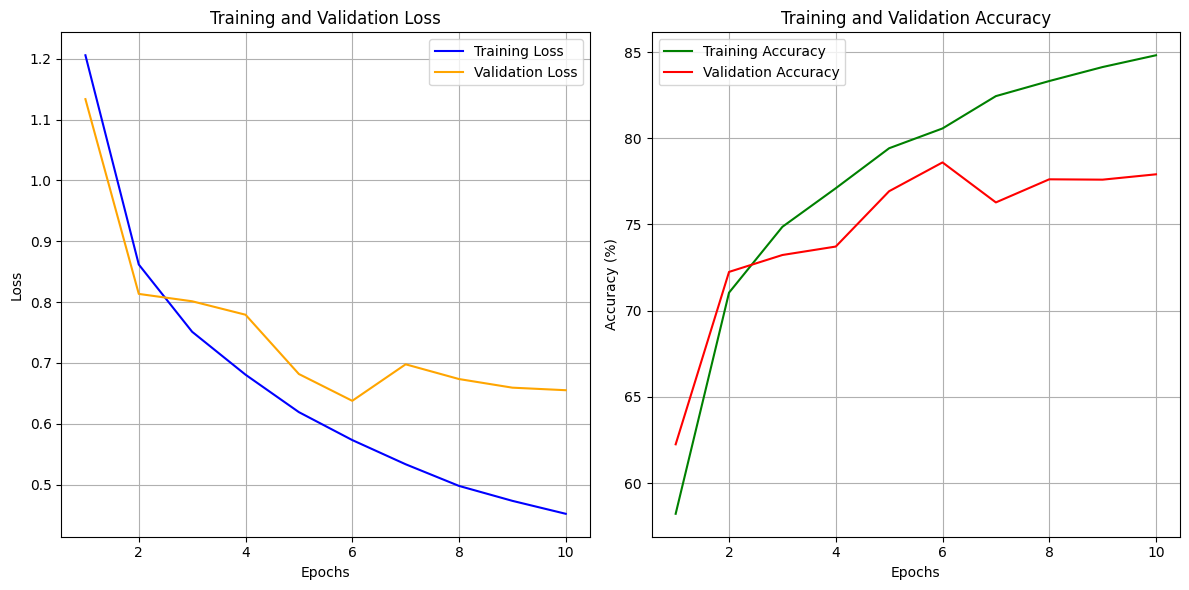

Test Accuracy: 77.62%


In [ ]:
# 5. Plotting Training and Validation Loss/Accuracy
# Plot training and validation losses
plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Evaluate the model on the test set
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate the model on the test set
evaluate_model(model, testloader)

USING SGD

In [ ]:
batch_size = 64
num_epochs = 10
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_subset, valset = random_split(trainset, [train_size, val_size])

trainloader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

valloader = DataLoader(valset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

model = models.resnet18(pretrained=True)

model.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

model.avgpool = nn.AdaptiveAvgPool2d((1, 1))

model.fc = nn.Linear(model.fc.in_features, 10)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.001)

def train_model(model, trainloader, valloader, criterion, optimizer, num_epochs):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Train the model
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_train_loss / len(trainloader)
        epoch_train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # Validate the model
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(valloader)
        epoch_val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%")
        print(f"Epoch {epoch+1}/{num_epochs} - Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")
        print("---"*30)

    print("Training complete")
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model and store the results
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, trainloader, valloader, criterion, optimizer, num_epochs
)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10 - Train Loss: 1.8238, Train Accuracy: 34.80%
Epoch 1/10 - Val Loss: 1.5017, Val Accuracy: 46.84%
------------------------------------------------------------------------------------------
Epoch 2/10 - Train Loss: 1.3476, Train Accuracy: 52.43%
Epoch 2/10 - Val Loss: 1.2473, Val Accuracy: 56.48%
------------------------------------------------------------------------------------------
Epoch 3/10 - Train Loss: 1.1476, Train Accuracy: 59.48%
Epoch 3/10 - Val Loss: 1.1158, Val Accuracy: 60.89%
------------------------------------------------------------------------------------------
Epoch 4/10 - Train Loss: 1.0108, Train Accuracy: 64.56%
Epoch 4/10 - Val Loss: 1.0246, Val Accuracy: 64.13%
------------------------------------------------------------------------------------------
Epoch 5/10 - Train Loss: 0.9087, Train Accuracy: 68.14%
Epoch 5/10 - Val Loss: 0.9607, Val Accuracy: 66.13%
------------------------------------------------------------------------------------------
Epoch

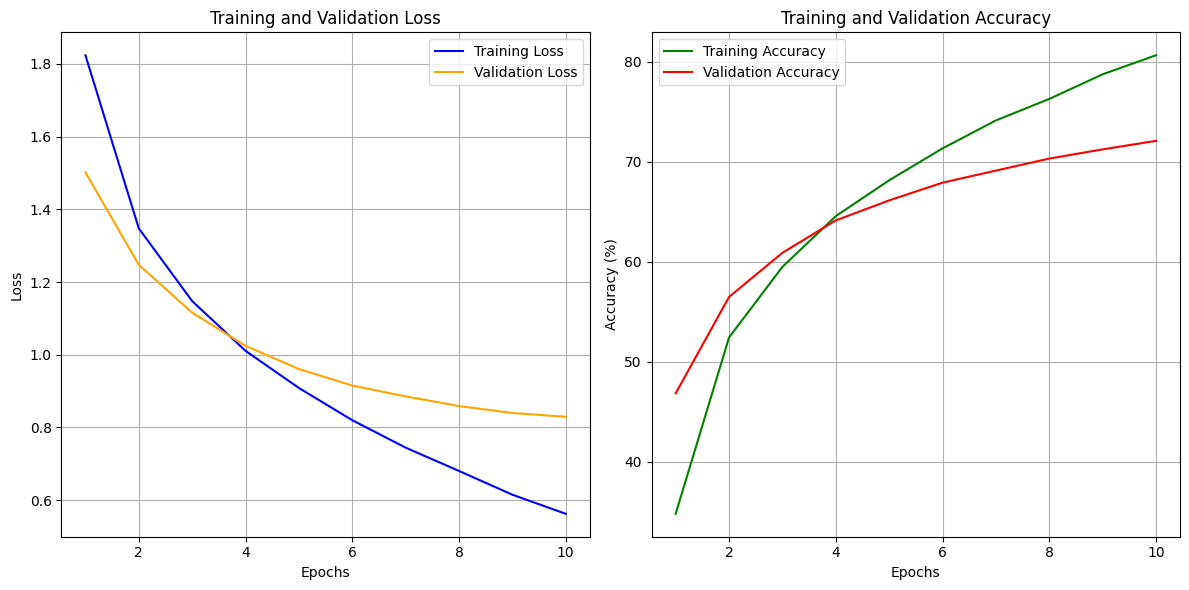

Test Accuracy: 71.62%


In [ ]:
# 5. Plotting Training and Validation Loss/Accuracy
# Plot training and validation losses
plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Evaluate the model on the test set
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate the model on the test set
evaluate_model(model, testloader)

reducing LR

In [ ]:
batch_size = 64
num_epochs = 50
learning_rate = 0.0001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_subset, valset = random_split(trainset, [train_size, val_size])

trainloader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

valloader = DataLoader(valset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

model = models.resnet18(pretrained=True)

model.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

model.avgpool = nn.AdaptiveAvgPool2d((1, 1))

model.fc = nn.Linear(model.fc.in_features, 10)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.001)

def train_model(model, trainloader, valloader, criterion, optimizer, num_epochs):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Train the model
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_train_loss / len(trainloader)
        epoch_train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # Validate the model
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(valloader)
        epoch_val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%")
        print(f"Epoch {epoch+1}/{num_epochs} - Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")
        print("---"*30)

    print("Training complete")
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model and store the results
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, trainloader, valloader, criterion, optimizer, num_epochs
)

100%|██████████| 170M/170M [00:04<00:00, 38.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 187MB/s]


Epoch 1/50 - Train Loss: 2.3353, Train Accuracy: 16.74%
Epoch 1/50 - Val Loss: 2.1872, Val Accuracy: 21.77%
------------------------------------------------------------------------------------------
Epoch 2/50 - Train Loss: 2.0753, Train Accuracy: 25.82%
Epoch 2/50 - Val Loss: 1.9959, Val Accuracy: 29.03%
------------------------------------------------------------------------------------------
Epoch 3/50 - Train Loss: 1.9237, Train Accuracy: 32.07%
Epoch 3/50 - Val Loss: 1.8532, Val Accuracy: 34.57%
------------------------------------------------------------------------------------------
Epoch 4/50 - Train Loss: 1.8048, Train Accuracy: 36.59%
Epoch 4/50 - Val Loss: 1.7477, Val Accuracy: 38.12%
------------------------------------------------------------------------------------------
Epoch 5/50 - Train Loss: 1.7071, Train Accuracy: 40.19%
Epoch 5/50 - Val Loss: 1.6658, Val Accuracy: 41.03%
------------------------------------------------------------------------------------------
Epoch

SGD Best

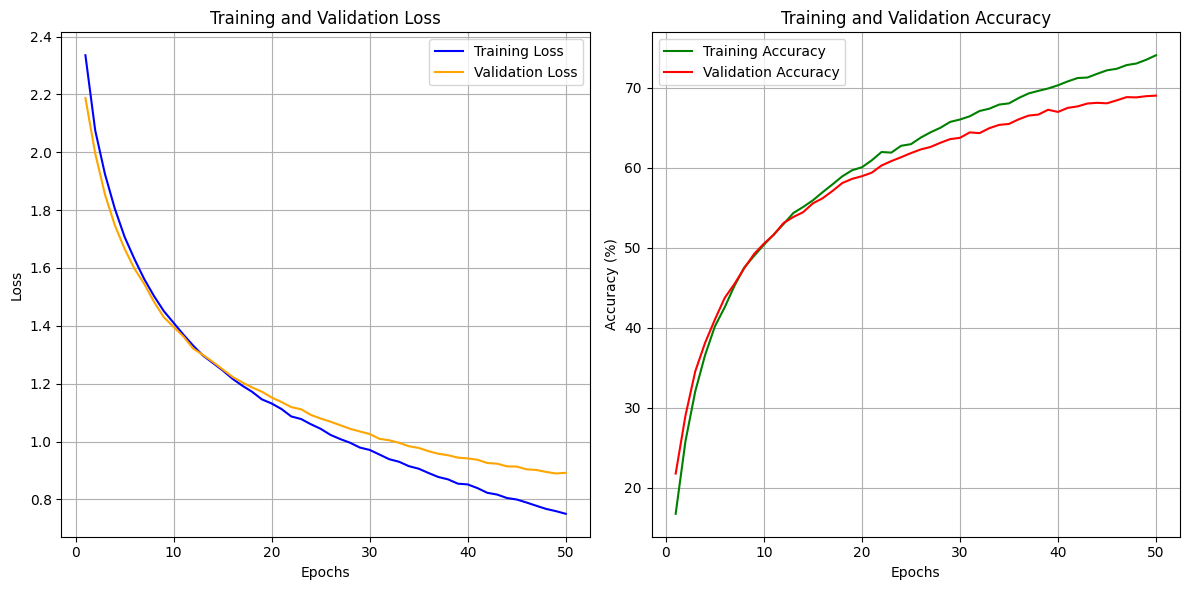

Test Accuracy: 68.58%


In [ ]:
# 5. Plotting Training and Validation Loss/Accuracy
# Plot training and validation losses
plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Evaluate the model on the test set
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate the model on the test set
evaluate_model(model, testloader)

use of lr = 0.0001, epochs = 100, batch size = 64

In [ ]:
batch_size = 64
num_epochs = 100
learning_rate = 0.0001

model = models.resnet18(pretrained=True)
model.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
model.avgpool = nn.AdaptiveAvgPool2d((1, 1))
model.fc = nn.Linear(model.fc.in_features, 10)

# device
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(dev)

# loss and optimser
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.0001)

# This we can use
def train_model(model, trloader, valoader, criterion, optimizer, num_epochs):
    train_loss, val_loss = [], []
    train_accu, val_accu = [], []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in trloader:
            inputs = inputs.to(dev)
            labels = labels.to(dev)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_ls = running_train_loss / len(trloader)
        epoch_train_accu = 100 * correct_train / total_train
        train_loss.append(epoch_train_ls)
        train_accu.append(epoch_train_accu)

        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(dev), labels.to(dev)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(valloader)
        epoch_val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%")
        print(f"Epoch {epoch+1}/{num_epochs} - Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.2f}%")
        print("---"*30)

    print("Training complete")
    return train_losses, val_losses, train_accuracies, val_accuracies

train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, trainloader, valloader, criterion, optimizer, num_epochs
)

100%|██████████| 170M/170M [00:12<00:00, 13.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 180MB/s]


Epoch 1/100 - Train Loss: 2.3568, Train Accuracy: 15.70%
Epoch 1/100 - Val Loss: 2.2204, Val Accuracy: 20.78%
------------------------------------------------------------------------------------------
Epoch 2/100 - Train Loss: 2.0861, Train Accuracy: 25.38%
Epoch 2/100 - Val Loss: 2.0216, Val Accuracy: 28.78%
------------------------------------------------------------------------------------------
Epoch 3/100 - Train Loss: 1.9236, Train Accuracy: 32.33%
Epoch 3/100 - Val Loss: 1.8868, Val Accuracy: 33.40%
------------------------------------------------------------------------------------------
Epoch 4/100 - Train Loss: 1.7981, Train Accuracy: 36.95%
Epoch 4/100 - Val Loss: 1.7755, Val Accuracy: 37.21%
------------------------------------------------------------------------------------------
Epoch 5/100 - Train Loss: 1.7066, Train Accuracy: 39.86%
Epoch 5/100 - Val Loss: 1.6939, Val Accuracy: 40.20%
--------------------------------------------------------------------------------------

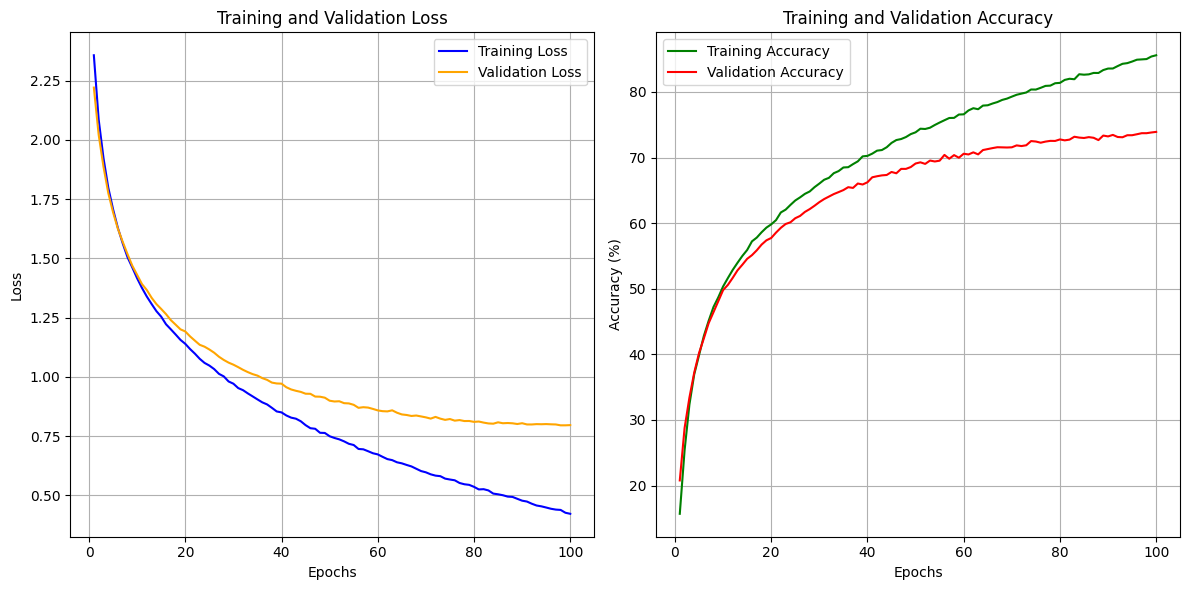

Test Accuracy: 73.80%


In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='green')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

def evaluate_model(model, tstloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in tstloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")
evaluate_model(model, tstloader)